In [6]:
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from utils import PCP, RLCP, CC, SCP, train_val_test_split, simulate_data
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

seed = 123456
np.random.seed(seed)

alpha = 0.1
num_samples = 15000
setting = 1

X, Y = simulate_data(num_samples,setting)
X_train, X_val, X_test, Y_train, Y_val, Y_test, X_test_0 = train_val_test_split(X,Y,1/3)

In [7]:
RF = RandomForestRegressor(random_state=123456).fit(X_train, Y_train)

predictions_val = RF.predict(X_val)
R_val = abs(Y_val - predictions_val)
predictions = RF.predict(X_test)
R_test = abs(Y_test - predictions)

kf = KFold(n_splits=10, random_state=123456, shuffle=True)
R_train = []
X_train_ = []

for train_index, val_index in kf.split(X_train):
    RF_k = RandomForestRegressor()
    RF_k.fit(X_train[train_index], Y_train[train_index])
    Y_val_pred = RF_k.predict(X_train[val_index])
    X_train_.append(X_train[val_index])
    R_train.append(abs(Y_train[val_index] - Y_val_pred))

R_train = np.concatenate(R_train)
X_train = np.concatenate(X_train_)

In [3]:
PCP_model = PCP()
PCP_model.train(X_train,R_train, info = True)
q_pcp, coverage_pcp, pi_list = PCP_model.calibrate(X_val, R_val,X_test, R_test, alpha,return_pi= True)

r_square: 0.9893384717995413
number of components: 3
sample size m: 276


5000it [29:33,  2.82it/s]
5000it [10:08,  8.22it/s]


In [4]:
q_scp, coverage_scp = SCP(R_val, R_test, alpha)
q_rlcp, coverage_rlcp = RLCP(X_train, X_val, R_val, X_test, R_test, alpha)

In [5]:
lbs, ubs, length_cc, coverage_cc = CC(RF, X_val, Y_val,  X_test, Y_test, alpha)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:05<00:00, 75.98it/s]


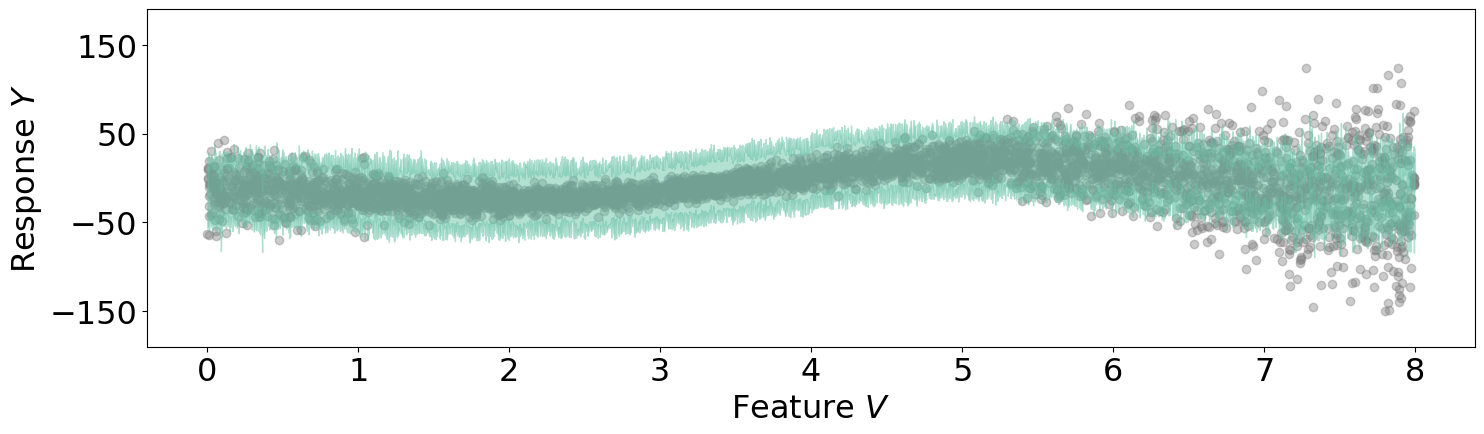

In [157]:
feature = 0
indices = np.argsort(X_test_0[:,feature])
set2_colors = sns.color_palette("Set2")

fig, ax = plt.subplots(figsize=(15,4.5))
fig.subplots_adjust(left=0.09,right=0.975,top=0.95,bottom=0.2,wspace=0.25, hspace=0.25)

ax.scatter(X_test_0[indices,feature], Y_test[indices], alpha=0.4,color = "tab:grey")
ax.fill_between(X_test_0[indices,feature], predictions[indices] -np.array(q_scp)[indices], predictions[indices]+np.array(q_scp)[indices], alpha=0.5,color= set2_colors[0])
ax.set_xlabel("Feature $V$", fontsize=23)
ax.set_ylabel("Response $Y$",fontsize=23)
ax.tick_params(axis='x', labelsize=23)
ax.tick_params(axis='y', labelsize=23)
ax.set_yticks(np.arange(-150, 151, step=100))
ax.set_ylim(-190,190)

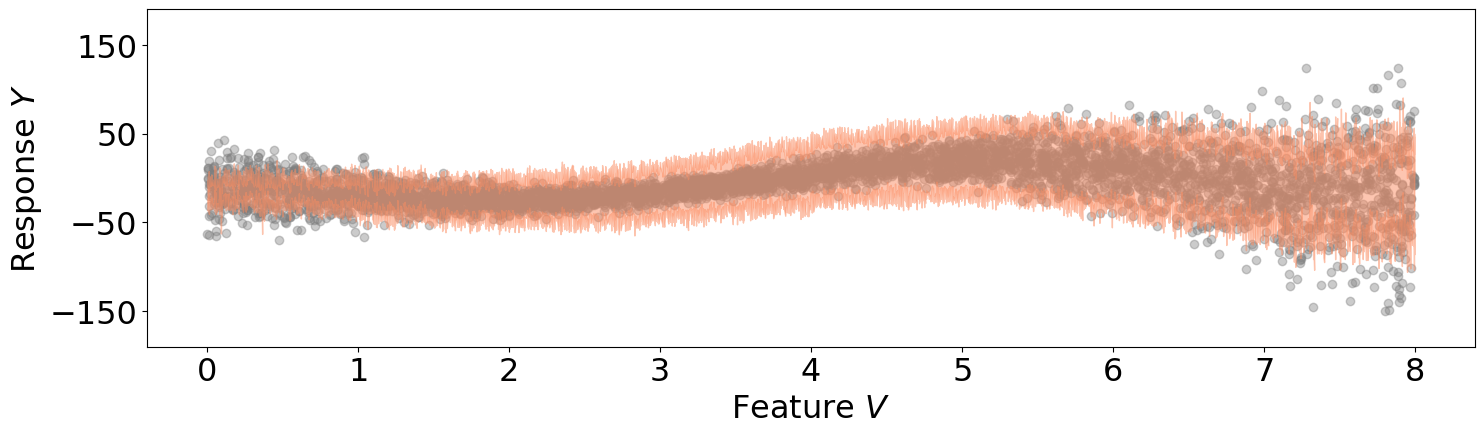

In [158]:
feature = 0
indices = np.argsort(X_test_0[:,feature])
set2_colors = sns.color_palette("Set2")

fig, ax = plt.subplots(figsize=(15,4.5))
fig.subplots_adjust(left=0.09,right=0.975,top=0.95,bottom=0.2,wspace=0.25, hspace=0.25)

ax.scatter(X_test_0[indices,feature], Y_test[indices], alpha=0.4,color = "tab:grey")
ax.fill_between(X_test_0[indices,feature], np.array(lbs)[indices], np.array(ubs)[indices], alpha=0.5,color= set2_colors[1])
ax.set_xlabel("Feature $V$", fontsize=23)
ax.set_ylabel("Response $Y$",fontsize=23)
ax.tick_params(axis='x', labelsize=23)
ax.tick_params(axis='y', labelsize=23)
ax.set_yticks(np.arange(-150, 151, step=100))
ax.set_ylim(-190,190)

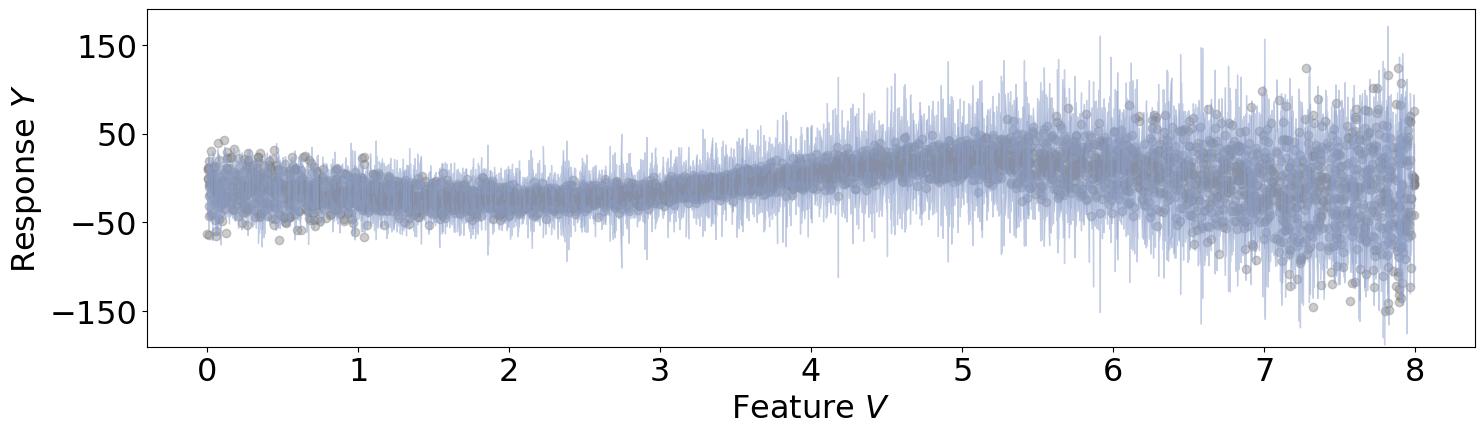

In [159]:
feature = 0
indices = np.argsort(X_test_0[:,feature])
set2_colors = sns.color_palette("Set2")

fig, ax = plt.subplots(figsize=(15,4.5))
fig.subplots_adjust(left=0.09,right=0.975,top=0.95,bottom=0.2,wspace=0.25, hspace=0.25)

ax.scatter(X_test_0[indices,feature], Y_test[indices], alpha=0.4,color = "tab:grey")
ax.fill_between(X_test_0[indices,feature], predictions[indices]
                 -np.array(q_rlcp)[indices], predictions[indices]
                 +np.array(q_rlcp)[indices], alpha=0.5,color= set2_colors[2])
ax.set_xlabel("Feature $V$", fontsize=23)
ax.set_ylabel("Response $Y$",fontsize=23)
ax.tick_params(axis='x', labelsize=23)
ax.tick_params(axis='y', labelsize=23)
ax.set_yticks(np.arange(-150, 151, step=100))
ax.set_ylim(-190,190)

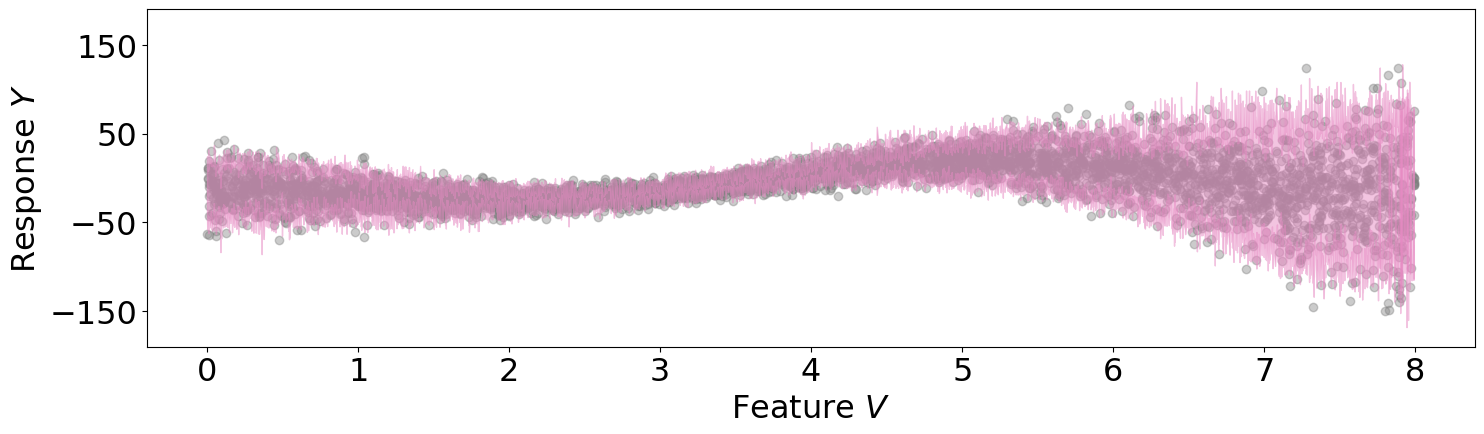

In [160]:
feature = 0
indices = np.argsort(X_test_0[:,feature])
set2_colors = sns.color_palette("Set2")

fig, ax = plt.subplots(figsize=(15,4.5))
fig.subplots_adjust(left=0.09,right=0.975,top=0.95,bottom=0.2,wspace=0.25, hspace=0.25)

ax.scatter(X_test_0[indices,feature], Y_test[indices], alpha=0.4,color = "tab:grey")
ax.fill_between(X_test_0[indices,feature], predictions[indices]
                 -np.array(q_pcp)[indices], predictions[indices]
                 +np.array(q_pcp)[indices], alpha=0.5,color= set2_colors[3])
ax.set_xlabel("Feature $V$", fontsize=23)
ax.set_ylabel("Response $Y$",fontsize=23)
ax.tick_params(axis='x', labelsize=23)
ax.tick_params(axis='y', labelsize=23)
ax.set_yticks(np.arange(-150, 151, step=100))
ax.set_ylim(-190,190)

In [101]:
feature = 0

x_grid = np.linspace(0, 8, 2000)
indices = np.argsort(X_test[:,feature])
coverage_scp_1 = []
coverage_cc_1 = []
coverage_rlcp_1 = []
coverage_pcp_1 = []


for x in tqdm(x_grid):
    idx = np.array(abs(x - X_test_0[:,feature])).argsort()[:250]
    coverage_scp_1.append(np.mean(np.array(q_scp)[idx]>=R_test[idx]))
    coverage_cc_1.append(np.mean((Y_test[idx]>=np.array(lbs)[idx])*(Y_test[idx]<=np.array(ubs)[idx])))
    coverage_rlcp_1.append(np.mean(np.array(q_rlcp)[idx]>=R_test[idx]))
    coverage_pcp_1.append(np.mean(np.array(q_pcp)[idx]>=R_test[idx]))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 590.57it/s]


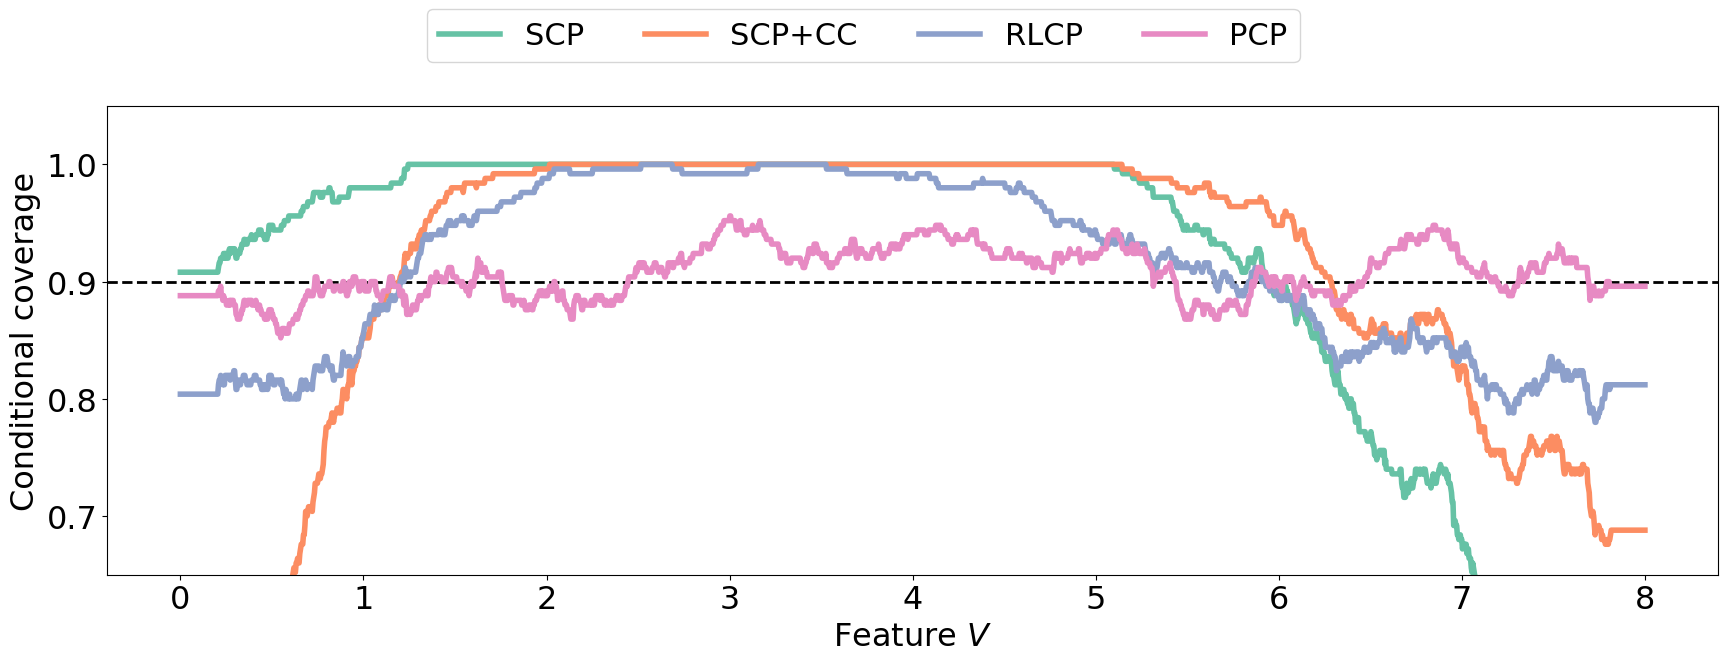

In [176]:
set2_colors = sns.color_palette("Set2")
fig, ax = plt.subplots(figsize=(18,7))
fig.subplots_adjust(left=0.08,right=0.975,top=0.82,bottom=0.15,wspace=0.25, hspace=0.25)
fig.legend(handles, ['SCP', 'SCP+CC', 'RLCP', 'PCP'], loc='upper center', ncol=4, bbox_to_anchor=(0.5, 0.98), fontsize=22)
ax.axhline(y=0.9, color='black', linestyle='--', linewidth=2) 
ax.plot(x_grid, np.array(coverage_scp_1), color=set2_colors[0], linewidth=4,label = "SCP")
ax.plot(x_grid, np.array(coverage_cc_1), color=set2_colors[1], linewidth=4,label = "SCP+CC")
ax.plot(x_grid, np.array(coverage_rlcp_1), color=set2_colors[2], linewidth=4,label = "RLCP")
ax.plot(x_grid, np.array(coverage_pcp_1), color=set2_colors[3], linewidth=4,label = "PCP")
ax.tick_params(axis='x', labelsize=23)
ax.tick_params(axis='y', labelsize=23)
ax.set_xlabel("Feature $V$", fontsize=23)
ax.set_ylabel("Conditional coverage", fontsize=23)
ax.set_ylim((0.65,1.05))
ax.set_yticks(np.arange(0.7, 1.01, step=0.1))

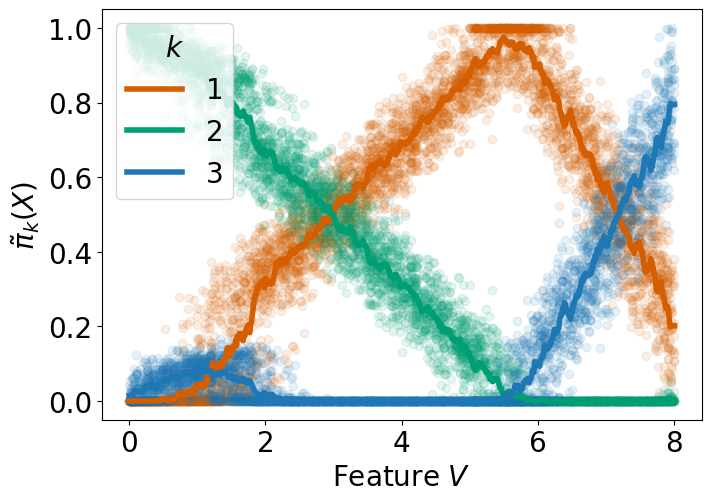

In [103]:
feature = 0
data_test = X_test_0[:,feature]
x_grid = np.linspace(0, 8,1000)
pi = np.array(pi_list)
N, K = np.shape(pi_list)

my_dict = {}
for k in range(K):
    my_dict[str(k)] = []
    for x in x_grid:
        idx = np.array(abs(x - data_test )**2).argsort()[:50]
        my_dict[str(k)].append(np.mean(pi[idx,k]))

fig, ax = plt.subplots(layout='constrained', figsize=(7,4.9))

ax.scatter(data_test, pi[:,0],color = "#D55E00",alpha=0.1)
ax.scatter(data_test, pi[:,1],color = "#009E73",alpha=0.1)
ax.scatter(data_test, pi[:,2],color = "tab:blue",alpha=0.1)
ax.plot(x_grid, my_dict[str(0)], linewidth=4,color = "#D55E00",label = '$1$')
ax.plot(x_grid, my_dict[str(1)], linewidth=4,color = "#009E73",label = '$2$')
ax.plot(x_grid, my_dict[str(2)], linewidth=4,color = "tab:blue",label = '$3$')
ax.set_ylabel(r'$\tilde{\pi}_k(X)$',fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.set_xlabel("Feature $V$", fontsize=20)
ax.tick_params(axis='y', labelsize=20)
legend = ax.legend(title="$k$",loc='upper left',   fontsize=20)
plt.setp(legend.get_title(), fontsize=20)

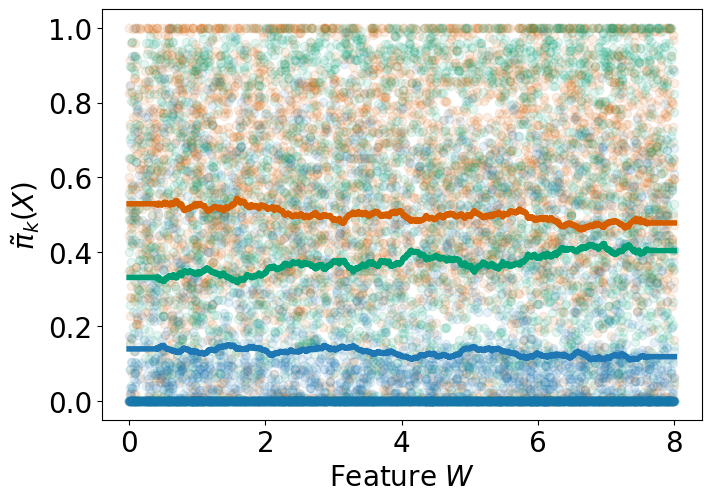

In [104]:
feature = 1
data_test = X_test_0[:,feature]
x_grid = np.linspace(0, 8,2000)
pi = np.array(pi_list)
N, K = np.shape(pi_list)

my_dict = {}
for k in range(K):
    my_dict[str(k)] = []
    for x in x_grid:
        idx = np.array(abs(x - data_test )**2).argsort()[:500]
        my_dict[str(k)].append(np.mean(pi[idx,k]))

fig, ax = plt.subplots(layout='constrained', figsize=(7,4.9))

ax.scatter(data_test, pi[:,0],color = "#D55E00",alpha=0.1)
ax.scatter(data_test, pi[:,1],color = "#009E73",alpha=0.1)
ax.scatter(data_test, pi[:,2],color = "tab:blue",alpha=0.1)
ax.plot(x_grid, my_dict[str(0)], linewidth=4,color = "#D55E00",label = '$1$')
ax.plot(x_grid, my_dict[str(1)], linewidth=4,color = "#009E73",label = '$2$')
ax.plot(x_grid, my_dict[str(2)], linewidth=4,color = "tab:blue",label = '$3$')
ax.set_ylabel(r'$\tilde{\pi}_k(X)$',fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.set_xlabel("Feature $W$", fontsize=20)
ax.tick_params(axis='y', labelsize=20)